In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [5]:
# 특징 데이터(X)와 레이블(y) 나누기
X=df.drop('Outcome',axis=1)  # 'Outcome' 컬럼을 레이블로 사용하고 나머지 컬럼을 특징으로 사용
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y=df['Outcome']
y.value_counts()

,count
Outcome,
0,500
1,268


In [7]:
# 레이블 인코딩 (One-hot encoding)
Y = pd.get_dummies(y).values  # 0과 1로 구성된 레이블을 one-hot 인코딩하여 모델 학습에 적합하게 변경

In [8]:
# 특징 데이터와 레이블 데이터를 NumPy 배열로 변환
X = X.values

In [9]:
from sklearn.model_selection import train_test_split
# 데이터 분할 (학습 데이터와 테스트 데이터)
# 80%를 학습 데이터로, 20%를 테스트 데이터로 사용하며 랜덤 시드를 0으로 고정
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
# 데이터의 형태 확인
# 학습 데이터와 테스트 데이터의 형태를 확인
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 2), (154, 2))

In [11]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

# 첫 번째 은닉층: 입력 차원은 8 (특징의 개수), 활성화 함수는 'relu'
model.add(Dense(16,input_shape=(8,),activation='relu'))
# 두 번째 은닉층
model.add(Dense(32,activation='relu'))
# 세 번째 은닉층
model.add(Dense(16,activation='relu'))
# 출력층: 두 개의 출력, 활성화 함수는 'sigmoid' (이진 분류에 적합)
model.add(Dense(2,activation='sigmoid'))


# 모델 컴파일
# 최적화 알고리즘은 Adam, 손실 함수는 이진 분류용 'binary_crossentropy', 평가 지표로 'accuracy' 사용
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250 (4.88 KB)

 Trainable params: 1,250 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 모델 학습
# 30번의 에폭 동안, 배치 크기는 32로 설정하고, 학습 데이터의 10%를 검증 데이터로 사용
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)

# 테스트 데이터에 대한 예측
# 학습된 모델을 이용해 테스트 데이터의 결과를 예측
y_pred = model.predict(X_test)

# 예측된 클래스와 실제 클래스 변환 (one-hot 인코딩을 역변환하여 비교 가능하게 만듦)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5198 - loss: 2.0938 - val_accuracy: 0.5323 - val_loss: 1.1019
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5677 - loss: 0.9389 - val_accuracy: 0.6452 - val_loss: 0.8452
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6408 - loss: 0.7575 - val_accuracy: 0.6613 - val_loss: 0.8402
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6509 - loss: 0.7106 - val_accuracy: 0.6613 - val_loss: 0.7880
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 0.6925 - val_accuracy: 0.6613 - val_loss: 0.7934
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.6677 - val_accuracy: 0.6613 - val_loss: 0.7930
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6392 - loss: 0.7019 - val_accuracy: 0.6774 - val_loss: 0.7052
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.6251 - val_accuracy: 0.6774 - val_loss

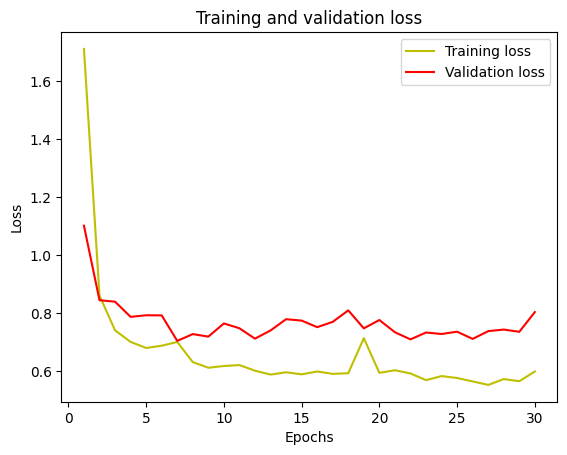

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 손실 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

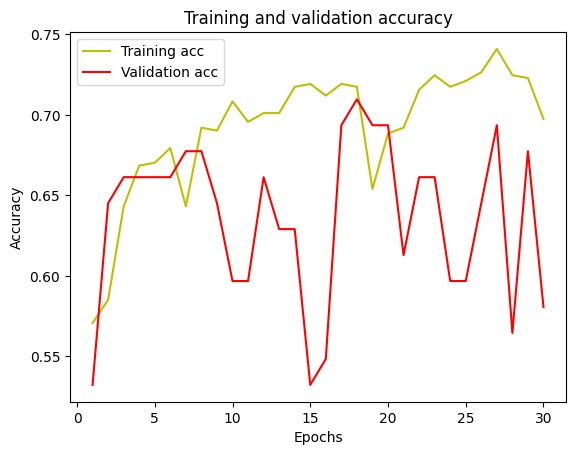

In [14]:
# 정확도 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# 테스트 데이터에 대한 모델의 성능을 평가하기 위해 분류 보고서와 혼동 행렬을 출력
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.65      0.73       107
           1       0.46      0.66      0.54        47

    accuracy                           0.66       154
   macro avg       0.63      0.66      0.63       154
weighted avg       0.70      0.66      0.67       154

[[70 37]
 [16 31]]


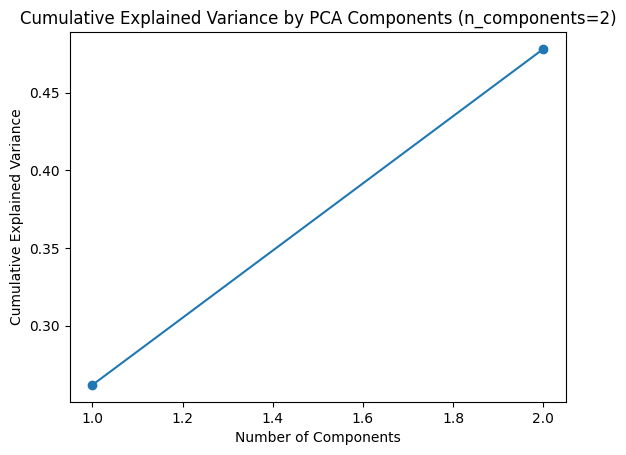

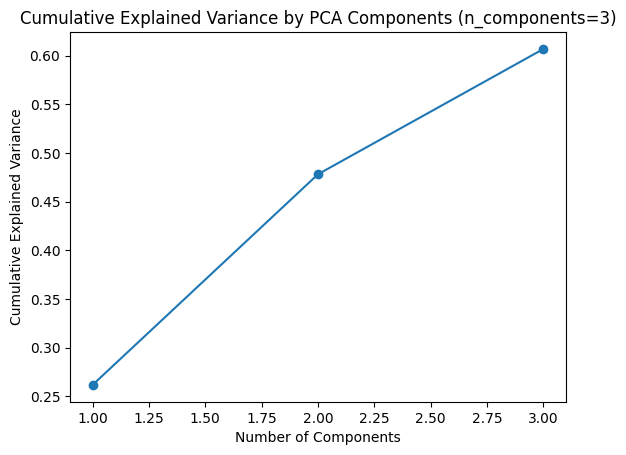

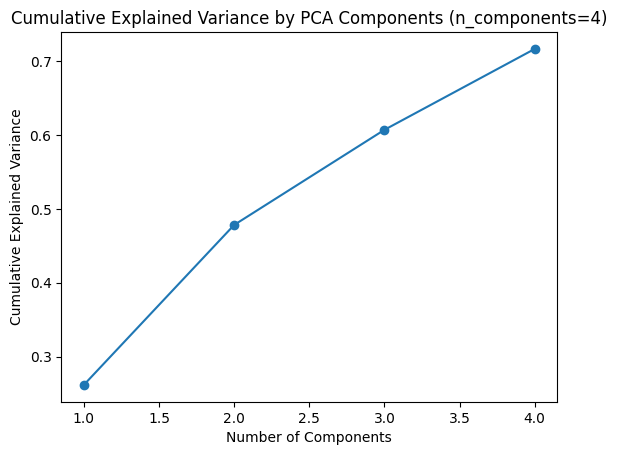

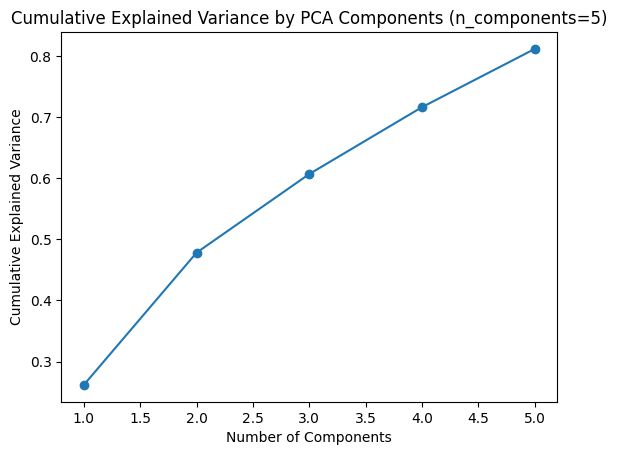

In [16]:
# 데이터 스케일링
# PCA를 수행하기 위해 데이터의 스케일을 조정 (평균 0, 분산 1로 표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 차원을 2, 3, 4, 5로 변경하며 분석
# PCA를 사용해 차원을 축소하고, 누적 설명 분산 비율을 시각화
pca_dimensions = [2, 3, 4, 5]
for dim in pca_dimensions:
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(X_scaled)

    # 누적 설명 분산 비율 시각화
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_.cumsum(),
             marker='o')
    plt.title(f'Cumulative Explained Variance by PCA Components (n_components={dim})')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()